In [1]:
%pylab inline
from __future__ import division
import scipy as sp
from scipy import stats
import mpld3
mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


In [2]:
from operator import mul    # or mul=lambda x,y:x*y
from fractions import Fraction

import operator as op
def nCr(n, r):
    r = min(r, n-r)
    if r == 0: return 1
    numer = reduce(op.mul, xrange(n, n-r, -1))
    denom = reduce(op.mul, xrange(1, r+1))
    return numer//denom

# def nCr(n,r): 
#   return int( reduce(mul, (Fraction(n-i, i+1) for i in range(r)), 1) )

# def nCr(n,r):
#     f = math.factorial
#     return f(n) / f(r) / f(n-r)

**Problem: Fixed codeword length, variable payload**

Rates in range $[\frac{4}{112}, \frac{4}{7}]$, with step $\frac{4}{112}$

Hamming code = 4 information bits, 3 parity bits, max rate = 4/7

Reed-Solomon in field $2^4 = 16$, $16 \cdot 7 = 112$

Brute force search for tolerable bit drop probability

Probability Hamming codeword fails:
$$ hcf = 1 - \left( (1-p_d)^7 + {7 \choose 1} p_d(1-p_d)^6 \right) $$

Probability Reed Solomon message fails:
$$ k = (1 - \text{rate}) * 16 $$
$$ \text{rsfail } = \sum_{d= \lceil k/2 \rceil}^{16} {16 \choose d} \, (1-hcf)^{16-d} \, (hcf)^d $$

$$ \text{rsfail } < 10^{-5} $$

[0.068000000000000005, 0.068000000000000005, 0.068000000000000005, 0.055, 0.055, 0.055, 0.055, 0.043000000000000003, 0.043000000000000003, 0.043000000000000003, 0.032000000000000001, 0.032000000000000001, 0.032000000000000001, 0.032000000000000001, 0.021000000000000001, 0.021000000000000001]


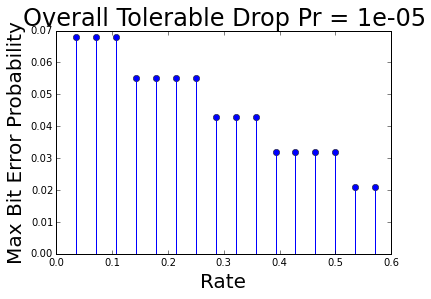

In [46]:
# for param in [10**i for i in range(-6, -3)]:
param = 10**(-5) # overall tolerable error

maxpd = []
pd = arange(0,0.1,0.001) # bit error prob
hammfail = 1 - ((1-pd)**7 + 7*(1-pd)**6*pd)

# ticks = arange(1, 17) # 0 should be 0, 17 is exclusive
rates = arange(4/112, 4/7*17/16, 4/112)

for rate in rates:
    reeddrop = []
    for hcf in hammfail:
        k = (1-rate)*16
        reeddrop.append(sum([nCr(16, d)*(1-hcf)**(16-d)*(hcf)**d for d in range(int(k/2)+1, 17)]))
    reedfail = filter(lambda x: x < param, reeddrop)
    maxpd.append(pd[(len(reedfail)-1)])

print(maxpd)

# for n in ticks:
#     reeddrop = []
#     for hamm in hammfail:
#         reeddrop.append(sum([nCr(16, d)*hamm**(16-d)*(1-hamm)**d for d in range(n-1)]))
# #     reeddrop = sum([nCr(16, d)*hammfail**(16-d)*(1-hammfail)**d for d in range(n-1)])
#     reedfail = filter(lambda x: x < param, reeddrop)
#     maxpd.append(pd[(len(reedfail)-1)])

figure()
stem(rates, array(maxpd), lw=2.0)
xlabel('Rate', fontsize=20)
ylabel('Max Bit Error Probability', fontsize=20)
title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)

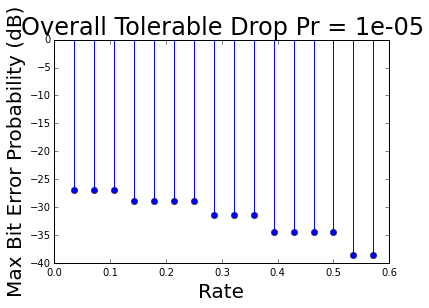

In [23]:
stem(x, 10*log(array(maxpd)), lw=2.0)
xlabel('Rate', fontsize=20)
ylabel('Max Bit Error Probability (dB)', fontsize=20)
title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)

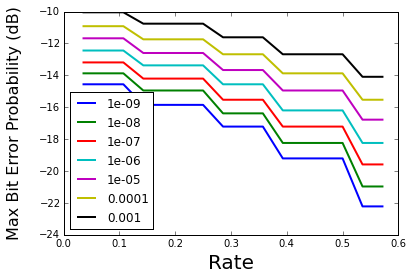

In [24]:
for param in [10**i for i in range(-9, -2)]:
    maxpd = []
    pd = arange(0,0.1,0.001) # bit error prob
    hcf = 1 - ((1-pd)**7 + 7*(1-pd)**6*pd)
    
    rates = arange(4/112, 4/7*17/16, 4/112)
    for rate in rates:
        reeddrop = []
        for hcf in hammfail:
            k = (1-rate)*16
            reeddrop.append(sum([nCr(16, d)*(1-hcf)**(16-d)*(hcf)**d for d in range(int(k/2)+1, 17)]))
        reedfail = filter(lambda x: x < param, reeddrop)
        maxpd.append(pd[(len(reedfail)-1)])
    
# print(maxpd)
#     ticks = arange(1, 17) # 0 should be 0
#     x = arange(4/112, 4/7*17/16, 4/112)

#     for n in ticks:
#         reeddrop = []
#         for hamm in hammfail:
#             reeddrop.append(sum([nCr(16, d)*hamm**(16-d)*(1-hamm)**d for d in range(n-1)]))
#         #     reeddrop = sum([nCr(16, d)*hammfail**(16-d)*(1-hammfail)**d for d in range(n-1)])
#         reedfail = filter(lambda x: x < param, reeddrop)
#         maxpd.append(pd[(len(reedfail)-1)])

    plot(x, 10*log10(array(maxpd)), lw=2.0, label=param)
    
xlabel('Rate', fontsize=20)
ylabel('Max Bit Error Probability (dB)', fontsize=16, labelpad=18)
# title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)
legend(loc=0)

**Problem: Fixed payload at 200 bits, variable codeword length (blocklength?)**

Rates in range $[\frac{4}{70}, \frac{4}{7}]$, with the denominator increasing by 7x

Hamming code = 4 information bits, 3 parity bits, max rate = 4/7

Two Hamming codewords put together $\rightarrow$ 8 information bits, 6 parity bits, max rate = 4/7

Reed-Solomon in field $2^8 = 256$, $256 \cdot 14 = 3,584$

200 information bits = 50 Hamming codewords = 25 Reed-Solomon words

Rates in range $25, 50, \cdots 250$

Probability Hamming codeword fails:
$$ hcf = 1 - \left( (1-p_d)^{14} + {14 \choose 1} p_d(1-p_d)^{13} + \left( {7 \choose 1} p_d(1-p_d)^6 \right)^2 \right) $$

Probability Reed Solomon message fails:
$$ \text{rsfail } = \sum_{d=25(x-1)+1}^{25x} {25x \choose d} (hcf)^d (1-hcf)^{25x-d}$$
where d stands for dropped bits, and this sum represents enough of the codeword is dropped that important words start being dropped as well. All of k (n+k) is dropped, and the 'final' 25 words in the payload (that are necessary for decoding) are now being encroached upon.)

$$ \text{rsfail } < 10^{-5} $$

('(Rate, Bit Drop Prob)', [(0.5714285714285714, 0.0), (0.2857142857142857, 0.088999999999999996), (0.19047619047619047, 0.13500000000000001), (0.14285714285714285, 0.16500000000000001), (0.11428571428571428, 0.187), (0.09523809523809523, 0.20500000000000002), (0.08163265306122448, 0.219), (0.07142857142857142, 0.23100000000000001), (0.06349206349206349, 0.24099999999999999), (0.05714285714285714, 0.25)])


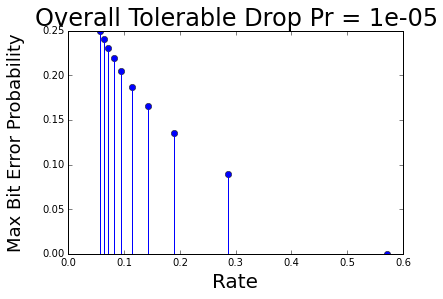

In [12]:
# MIGHT BE OLD--ERASURES INSTEAD OF GENERAL ERRORS

# for param in [10**i for i in range(-6, -3)]:
param = 10**(-5) # overall tolerable error

maxpd = []
pd = arange(0,0.5,0.001) # bit error prob
hammfail = 1 - ((1-pd)**14 + 14*(1-pd)**13*pd + (7*(1-pd)**6*pd)**2)

rates = [4/(7*x) for x in xrange(1, 11)] # 11 exclusive

for x in xrange(1,11):
#     reeddrop = []
#     for hcf in hammfail:
#         reeddrop.append(sum([nCr(25*x, d)* hcf**d *(1-hcf)**(25*x-d) for d in range(25*(x-1)+1, 25*x)]))
    reeddrop = [sum([nCr(25*x, d)* hcf**d *(1-hcf)**(25*x-d) for d in range(25*(x-1)+1, 25*x)]) for hcf in hammfail]
    reedfail = filter(lambda x: x < param, reeddrop)
    maxpd.append(pd[(len(reedfail)-1)])

print('(Rate, Bit Drop Prob)', zip(rates, maxpd))
    
figure()
stem(rates, maxpd, lw=2.0)
# stem(x, log10(array(maxpd)), lw=2.0)
xlabel('Rate', fontsize=20)
ylabel('Max Bit Error Probability', fontsize=18, labelpad = 18)
title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)

/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


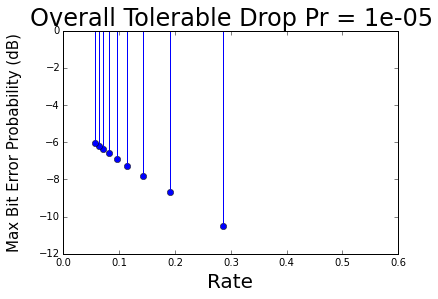

In [13]:
stem(rates, 10*log10(array(maxpd)), lw=2.0)
xlabel('Rate', fontsize=20)
ylabel('Max Bit Error Probability (dB)', fontsize=15, labelpad = 18)
title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)

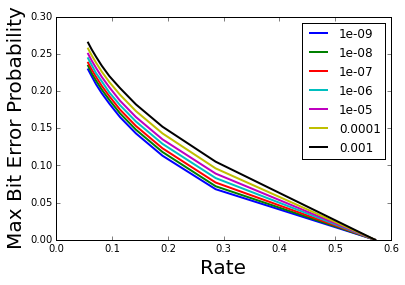

In [14]:
# Multiple params

for param in [10**i for i in range(-9, -2)]:
    maxpd = []
    pd = arange(0,0.5,0.001) # bit error prob
    hammfail = 1 - ((1-pd)**14 + 14*(1-pd)**13*pd + (7*(1-pd)**6*pd)**2)

    rates = [4/(7*x) for x in xrange(1, 11)] # 11 exclusive

    for x in xrange(1,11):
        reeddrop = [sum([nCr(25*x, d)* hcf**d *(1-hcf)**(25*x-d) for d in range(25*(x-1)+1, 25*x)]) for hcf in hammfail]
        reedfail = filter(lambda x: x < param, reeddrop)
        maxpd.append(pd[(len(reedfail)-1)])

    plot(rates, maxpd, lw=2.0,label=param)

xlabel('Rate', fontsize=20)
ylabel('Max Bit Error Probability', fontsize=20)
# title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)
legend(loc=0)

('Param', 1e-09, 'Maxpd', [0.0, 0.068000000000000005, 0.113, 0.14300000000000002, 0.16500000000000001, 0.183, 0.19700000000000001, 0.20899999999999999, 0.22, 0.22900000000000001])
('Param', 1e-08, 'Maxpd', [0.0, 0.072000000000000008, 0.11800000000000001, 0.14799999999999999, 0.17000000000000001, 0.188, 0.20200000000000001, 0.214, 0.224, 0.23400000000000001])
('Param', 1e-07, 'Maxpd', [0.0, 0.076999999999999999, 0.123, 0.153, 0.17500000000000002, 0.193, 0.20700000000000002, 0.219, 0.22900000000000001, 0.23800000000000002])
('Param', 1e-06, 'Maxpd', [0.0, 0.083000000000000004, 0.129, 0.159, 0.18099999999999999, 0.19800000000000001, 0.21299999999999999, 0.224, 0.23500000000000001, 0.24399999999999999])
('Param', 1e-05, 'Maxpd', [0.0, 0.088999999999999996, 0.13500000000000001, 0.16500000000000001, 0.187, 0.20500000000000002, 0.219, 0.23100000000000001, 0.24099999999999999, 0.25])
('Param', 0.0001, 'Maxpd', [0.0, 0.096000000000000002, 0.14300000000000002, 0.17300000000000001, 0.195000000000

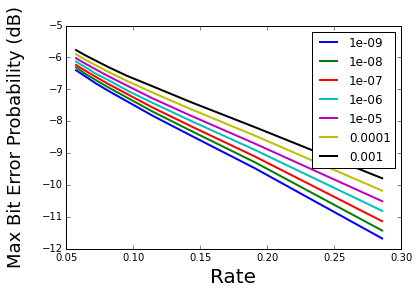

In [19]:
# Multiple params dB

for param in [10**i for i in range(-9, -2)]:
    maxpd = []
    pd = arange(0,0.5,0.001) # bit error prob
    hammfail = 1 - ((1-pd)**14 + 14*(1-pd)**13*pd + (7*(1-pd)**6*pd)**2)

    rates = [4/(7*x) for x in xrange(1, 11)] # 11 exclusive

    for x in xrange(1,11):
        reeddrop = [sum([nCr(25*x, d)* hcf**d *(1-hcf)**(25*x-d) for d in range(25*(x-1)+1, 25*x)]) for hcf in hammfail]
        reedfail = filter(lambda x: x < param, reeddrop)
        maxpd.append(pd[(len(reedfail)-1)])

#     print('Param', param, 'Maxpd', maxpd)
    plot(rates[1:], 10*log10(array(maxpd[1:])), lw=2.0,label=param)

xlabel('Rate', fontsize=20)
ylabel('Max Bit Error Probability (dB)', fontsize=18, labelpad=18)
# title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)
legend(loc=0)

**Problem: Fixed payload at 200 bits, variable codeword length--More points**

Rates in range $[\frac{4}{70}, \frac{4}{7}] \rightarrow [\frac{200}{3584}, \frac{200}{350}]$, with the denominator increasing by 14 bits (1 RS word.)

Hamming code = 4 information bits, 3 parity bits, max rate = 4/7

Two Hamming codewords put together $\rightarrow$ 8 information bits, 6 parity bits, max rate = 4/7

Reed-Solomon in field $2^8 = 256$, $256 \cdot 14 = 3,584$

200 information bits = 50 Hamming codewords = 25 Reed-Solomon words

Probability Hamming codeword fails:
$$ hcf = 1 - \left( (1-p_d)^{14} + {14 \choose 1} p_d(1-p_d)^{13} + \left( {7 \choose 1} p_d(1-p_d)^6 \right)^2 \right) $$

Probability Reed Solomon message fails:
$$ \text{rsfail } = \sum_{d= \lceil \frac{k}{2} \rceil +1}^{25+k} {25+k \choose d} (hcf)^d (1-hcf)^{25+k-d}$$
where d stands for dropped RS words, and this sum represents enough of the codeword is dropped that important words start being dropped as well. All of k (n+k) is dropped, and the 'final' 25 words in the payload (that are necessary for decoding) are now being encroached upon.) k is in the range (0, 231) so that the final blocklength is in the range (25, 256).

$$ \text{rsfail } < 10^{-5} $$

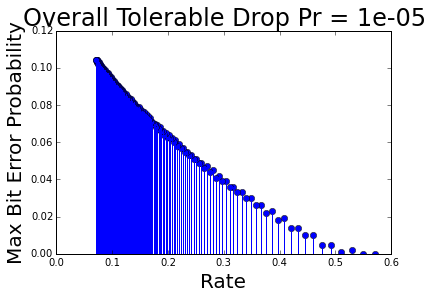

In [6]:
# More points!! 
param = 10**(-5) # overall tolerable error

maxpd = []
pd = arange(0,0.5,0.001) # bit error prob
hammfail = 1 - ((1-pd)**14 + 14*(1-pd)**13*pd + (7*(1-pd)**6*pd)**2)

rates = [200/(block*14) for block in xrange(25,201)] # 11 exclusive

for k in xrange(0, 176): #257 exclusive
    reeddrop = [sum([nCr(25+k, d)* hcf**d *(1-hcf)**(25+k-d) for d in range(int(k/2)+1, 25+k)]) for hcf in hammfail]
    reedfail = filter(lambda x: x < param, reeddrop)
    maxpd.append(pd[(len(reedfail)-1)])
    
# figure()
stem(rates, maxpd, lw=2.0)
xlabel('Rate', fontsize=20)
ylabel('Max Bit Error Probability', fontsize=20)
title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)

/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


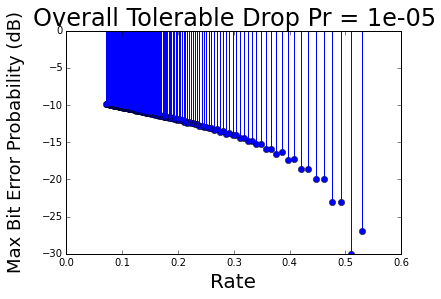

In [32]:
stem(rates, 10*log10(array(maxpd)), lw=2.0)
xlabel('Rate', fontsize=20)
ylabel('Max Bit Error Probability (dB)', fontsize=18, labelpad=18)
title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)

**Alternative Scheme: 4,3 Hamming in 'Detection mode'**

Fixed payload = 200 bits

Rates in range $[\frac{4}{70}, \frac{4}{7}] \rightarrow [\frac{200}{3584}, \frac{200}{350}]$, with the denominator increasing by 14 bits (1 RS word.)

Hamming code = 4 information bits, 3 parity bits, max rate = 4/7

Two Hamming codewords put together $\rightarrow$ 8 information bits, 6 parity bits, max rate = 4/7

Reed-Solomon in field $2^8 = 256$, $256 \cdot 14 = 3,584$

200 information bits = 50 Hamming codewords = 25 Reed-Solomon words

OLD >> Probability Hamming codeword fails:
$$ hcf = 1 - \left( (1-p_d)^{14} \right)$$

Probability Reed Solomon message fails:
$$ \text{rsfail } = \sum_{d=k+1}^{25+k} {25+k \choose d} (hcf)^d (1-hcf)^{25+k-d}$$
where d stands for dropped bits, and this sum represents enough of the codeword is dropped that important words start being dropped as well. All of k (n+k) is dropped, and the 'final' 25 words in the payload (that are necessary for decoding) are now being encroached upon.) k is in the range (0, 231) so that the final blocklength is in the range (25, 256).

$$ \text{rsfail } < 10^{-5} $$

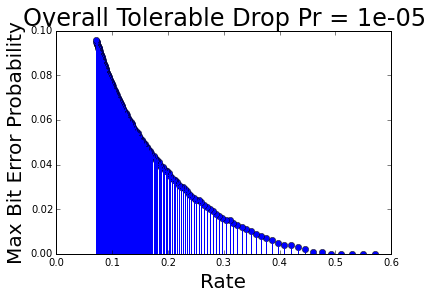

In [3]:
# Detection Mode -- Erasures
param = 10**(-5) # overall tolerable error

maxpd = []
pd = arange(0,0.5,0.001) # bit error prob
hammfail = 1 - ((1-pd)**14)

rates = [200/(block*14) for block in xrange(25,201)] # 11 exclusive

for k in xrange(0, 176): #257 exclusive
    reeddrop = [sum([nCr(25+k, d)* hcf**d *(1-hcf)**(25+k-d) for d in range(k+1, 25+k)]) for hcf in hammfail]
    reedfail = filter(lambda x: x < param, reeddrop)
    maxpd.append(pd[(len(reedfail)-1)])
    
# figure()
stem(rates, maxpd, lw=2.0)
xlabel('Rate', fontsize=20)
ylabel('Max Bit Error Probability', fontsize=20)
title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)

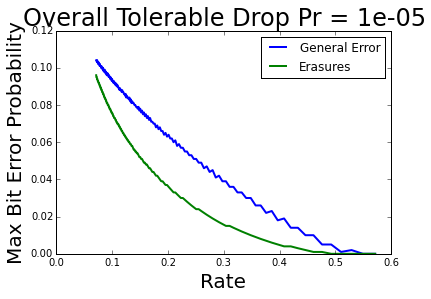

In [4]:
# Comparison Gen Error vs. Erasures
param = 10**(-5) # overall tolerable error

maxpdgen = []
maxpder = []
pd = arange(0,0.5,0.001) # bit error prob
hammfailgen = 1 - ((1-pd)**14 + 14*(1-pd)**13*pd + (7*(1-pd)**6*pd)**2)
hammfailer = 1 - ((1-pd)**14)

rates = [200/(block*14) for block in xrange(25,201)] # 11 exclusive

for k in xrange(0, 176): #257 exclusive
    # General Errors
    reeddropgen = [sum([nCr(25+k, d)* hcf**d *(1-hcf)**(25+k-d) for d in range(int(k/2)+1, 25+k)]) for hcf in hammfailgen]
    reedfailgen = filter(lambda x: x < param, reeddropgen)
    maxpdgen.append(pd[(len(reedfailgen)-1)])
    # Erasures
    reeddroper = [sum([nCr(25+k, d)* hcf**d *(1-hcf)**(25+k-d) for d in range(k+1, 25+k)]) for hcf in hammfailer]
    reedfailer = filter(lambda x: x < param, reeddroper)
    maxpder.append(pd[(len(reedfailer)-1)])
    
# figure()
plot(rates, maxpdgen, lw=2.0, label='General Error')
plot(rates, maxpder, lw=2.0, label='Erasures')
legend()
xlabel('Rate', fontsize=20)
ylabel('Max Bit Error Probability', fontsize=20)
title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)

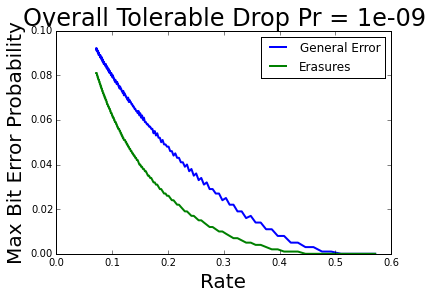

In [5]:
# Comparison: Gen Errors vs. Erasures
param = 10**(-9) # overall tolerable error

maxpdgen = []
maxpder = []
pd = arange(0,0.5,0.001) # bit error prob
hammfailgen = 1 - ((1-pd)**14 + 14*(1-pd)**13*pd + (7*(1-pd)**6*pd)**2)
hammfailer = 1 - ((1-pd)**14)

rates = [200/(block*14) for block in xrange(25,201)] # 11 exclusive

for k in xrange(0, 176): #257 exclusive
    # General Errors
    reeddropgen = [sum([nCr(25+k, d)* hcf**d *(1-hcf)**(25+k-d) for d in range(int(k/2)+1, 25+k)]) for hcf in hammfailgen]
    reedfailgen = filter(lambda x: x < param, reeddropgen)
    maxpdgen.append(pd[(len(reedfailgen)-1)])
    # Erasures
    reeddroper = [sum([nCr(25+k, d)* hcf**d *(1-hcf)**(25+k-d) for d in range(k+1, 25+k)]) for hcf in hammfailer]
    reedfailer = filter(lambda x: x < param, reeddroper)
    maxpder.append(pd[(len(reedfailer)-1)])
    
# figure()
plot(rates, maxpdgen, lw=2.0, label='General Error')
plot(rates, maxpder, lw=2.0, label='Erasures')
legend()
xlabel('Rate', fontsize=20)
ylabel('Max Bit Error Probability', fontsize=20)
title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)

## SNR

Capacity:
$$ SNR = 2^R - 1 $$

Code SNR:
$$ \sqrt{SNR} = Q^{-1}(\text{p_bitdrop}) = \sqrt{2} \text{erf}^{-1}(1 - 2\text{p_bitdrop}) $$

('(Rate, Bit Drop Prob)', [(0.5714285714285714, 0.0), (0.5494505494505495, 0.0), (0.5291005291005291, 0.002), (0.5102040816326531, 0.0018000000000000002), (0.49261083743842365, 0.0058000000000000005), (0.47619047619047616, 0.0055999999999999999), (0.4608294930875576, 0.010200000000000001), (0.44642857142857145, 0.01), (0.4329004329004329, 0.014800000000000001), (0.42016806722689076, 0.014400000000000001), (0.40816326530612246, 0.019), (0.3968253968253968, 0.018800000000000001), (0.3861003861003861, 0.023), (0.37593984962406013, 0.022800000000000001), (0.3663003663003663, 0.026800000000000001), (0.35714285714285715, 0.0264), (0.34843205574912894, 0.0304), (0.3401360544217687, 0.030000000000000002), (0.33222591362126247, 0.033800000000000004), (0.3246753246753247, 0.0332), (0.31746031746031744, 0.036799999999999999), (0.3105590062111801, 0.036400000000000002), (0.303951367781155, 0.039600000000000003), (0.2976190476190476, 0.039199999999999999), (0.2915451895043732, 0.0424), (0.285714285

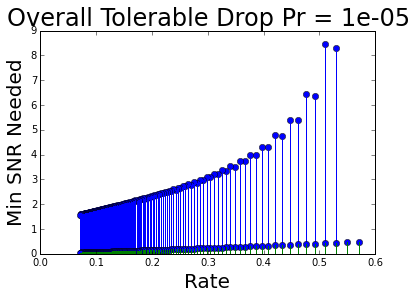

In [38]:
param = 10**(-5) # overall tolerable error

maxpd = []
pd = arange(0,0.11,0.0002) # bit error prob
hammfail = 1 - ((1-pd)**14 + 14*(1-pd)**13*pd + (7*(1-pd)**6*pd)**2)

rates = [200/(block*14) for block in xrange(25,201)] # 11 exclusive
maxCSNR = [2**R-1 for R in rates] # max achievable SNR at full capacity

for k in xrange(0, 176): #257 exclusive
    reeddrop = [sum([nCr(25+k, d)* hcf**d *(1-hcf)**(25+k-d) for d in range(int(k/2)+1, 25+k)]) for hcf in hammfail]
    reedfail = filter(lambda x: x < param, reeddrop)
    maxpd.append(pd[(len(reedfail)-1)])

minSNR = [(sqrt(2)*sp.special.erfinv(1-2*bitdrop))**2 for bitdrop in maxpd] #given bit drop prob min SNR needed to decode
# print('(Rate, Bit Drop Prob)', zip(rates, maxpd))
    
# figure()
stem(rates, minSNR, lw=1.0)
stem(rates,maxCSNR, lw=2.5, linefmt='g')
xlabel('Rate', fontsize=20)
ylabel('Min SNR Needed', fontsize=20)
title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)

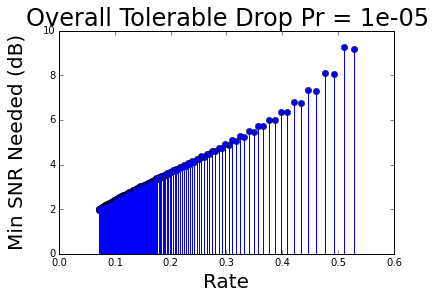

In [40]:
stem(rates, 10*log10(array(minSNR)), lw=2.0)
xlabel('Rate', fontsize=20)
ylabel('Min SNR Needed (dB)', fontsize=20, labelpad=18)
title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)

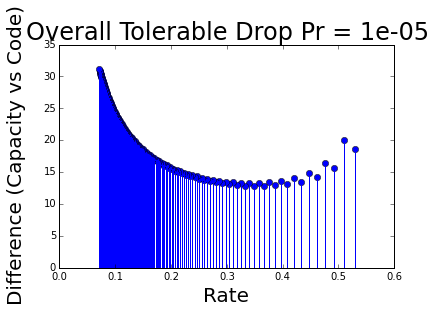

In [41]:
diffSNR = array(minSNR)/array(maxCSNR)
stem(rates, diffSNR, lw=2.0)
xlabel('Rate', fontsize=20)
ylabel('Difference (Capacity vs Code)', fontsize=20, labelpad=18)
title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)

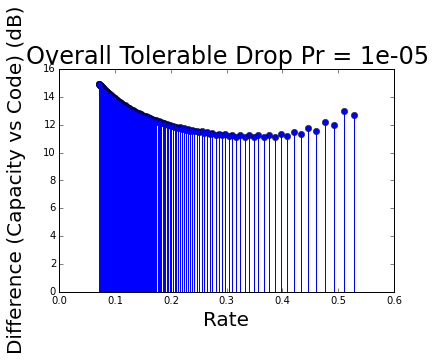

In [42]:
diffSNR = 10*(log10(array(minSNR)) - log10(array(maxCSNR)))
stem(rates, diffSNR, lw=2.0)
xlabel('Rate', fontsize=20)
ylabel('Difference (Capacity vs Code) (dB)', fontsize=20, labelpad=18)
title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)

In [ ]:
# print('Rate, SNR at max C, Min SNR for Pr(bitdrop), Difference')
# for i in range(len(rates)):
#     print(rates[i], maxCSNR[i], minSNR[i], diffSNR[i])

## Tolerable Drop = $10^{-2}$

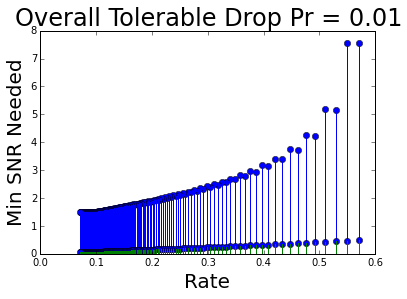

In [47]:
param = 10**(-2) # overall tolerable error

maxpd = []
pd = arange(0,0.11,0.0002) # bit error prob
hammfail = 1 - ((1-pd)**14 + 14*(1-pd)**13*pd + (7*(1-pd)**6*pd)**2)

rates = [200/(block*14) for block in xrange(25,201)] # 11 exclusive
maxCSNR = [2**R-1 for R in rates] # max achievable SNR at full capacity

for k in xrange(0, 176): #257 exclusive
    reeddrop = [sum([nCr(25+k, d)* hcf**d *(1-hcf)**(25+k-d) for d in range(int(k/2)+1, 25+k)]) for hcf in hammfail]
    reedfail = filter(lambda x: x < param, reeddrop)
    maxpd.append(pd[(len(reedfail)-1)])

minSNR = [(sqrt(2)*sp.special.erfinv(1-2*bitdrop))**2 for bitdrop in maxpd] #given bit drop prob min SNR needed to decode
    
# figure()
stem(rates, minSNR, lw=1.0)
stem(rates,maxCSNR, lw=2.5, linefmt='g')
xlabel('Rate', fontsize=20)
ylabel('Min SNR Needed', fontsize=20)
title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)

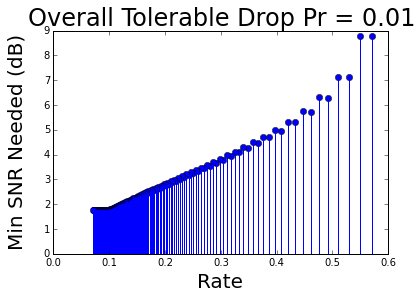

In [48]:
stem(rates, 10*log10(array(minSNR)), lw=2.0)
xlabel('Rate', fontsize=20)
ylabel('Min SNR Needed (dB)', fontsize=20, labelpad=18)
title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)

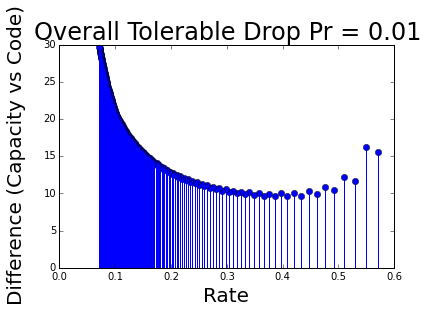

In [49]:
diffSNR = array(minSNR)/array(maxCSNR)
stem(rates, diffSNR, lw=2.0)
xlabel('Rate', fontsize=20)
ylabel('Difference (Capacity vs Code)', fontsize=20, labelpad=18)
title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)

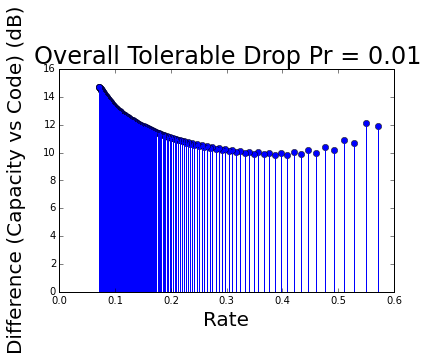

In [50]:
diffSNR = 10*(log10(array(minSNR)) - log10(array(maxCSNR)))
stem(rates, diffSNR, lw=2.0)
xlabel('Rate', fontsize=20)
ylabel('Difference (Capacity vs Code) (dB)', fontsize=20, labelpad=18)
title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)

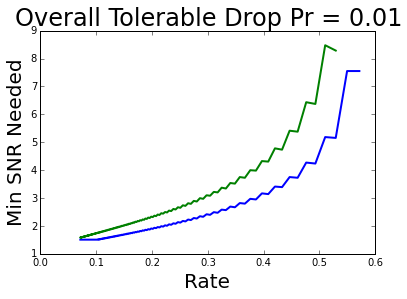

In [51]:
# Comparison
#param = 10**(-2) # overall tolerable error

maxpd2 = []
maxpd5 = []

pd = arange(0,0.11,0.0002) # bit error prob
hammfail = 1 - ((1-pd)**14 + 14*(1-pd)**13*pd + (7*(1-pd)**6*pd)**2)

rates = [200/(block*14) for block in xrange(25,201)] # 11 exclusive
# maxCSNR = [2**R-1 for R in rates] # max achievable SNR at full capacity

for k in xrange(0, 176): #257 exclusive
    reeddrop = [sum([nCr(25+k, d)* hcf**d *(1-hcf)**(25+k-d) for d in range(int(k/2)+1, 25+k)]) for hcf in hammfail]
    reedfail2 = filter(lambda x: x < 10**(-2), reeddrop)
    reedfail5 = filter(lambda x: x < 10**(-5), reeddrop)
    maxpd2.append(pd[(len(reedfail2)-1)])
    maxpd5.append(pd[(len(reedfail5)-1)])

minSNR2 = [(sqrt(2)*sp.special.erfinv(1-2*bitdrop))**2 for bitdrop in maxpd2] #given bit drop prob min SNR needed to decode
minSNR5 = [(sqrt(2)*sp.special.erfinv(1-2*bitdrop))**2 for bitdrop in maxpd5] 

# figure()
plot(rates, minSNR2, lw=2.0, label=10**(-2))
plot(rates[2:], minSNR5[2:], lw=2.0, label=10**(-5))
legend(loc=0)
# stem(rates,maxCSNR, lw=2.5, linefmt='g')
xlabel('Rate', fontsize=20)
ylabel('Min SNR Needed', fontsize=20)
title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)

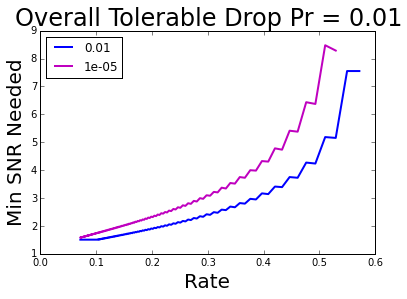

In [60]:
plot(rates, minSNR2, 'b', lw=2.0, label=10**(-2))
plot(rates[2:], minSNR5[2:], 'm', lw=2.0, label=10**(-5))
legend(loc=0)
# stem(rates,maxCSNR, lw=2.5, linefmt='g')
xlabel('Rate', fontsize=20)
ylabel('Min SNR Needed', fontsize=20)
title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)

## Interlude: Scripts for Vasuki

In [ ]:
# Erasure = True --> detection mode
# All SNR actually faded SNR
def p_error(n, blocklength, erasure, SNR): # probability reed solomon code fails
    # might need to check if SNR belongs in sqrt
    pd = 0.5*sp.special.erfc(SNR/sqrt(2))
    k = blocklength - payload
    if erasure:
        hcf = 1 - (1-pd)**14
        reeddrop = sum([nCr(blocklength, d)* hcf**d *(1-hcf)**(blocklength-d) for d in range(k+1, blocklength)])
    else:
        hcf = 1 - ((1-pd)**14 + 14*(1-pd)**13*pd + (7*(1-pd)**6*pd)**2)
        reeddrop = sum([nCr(blocklength, d)* hcf**d *(1-hcf)**(blocklength-d) for d in range(int(k/2)+1, blocklength)])
    return reeddrop

In [ ]:
def pfail(msgsize, blocklength, N, SNR): #no rate change 2-hop
#     N = number of nodes
#     payload = msgsize*numnodes
#     rate = payload/blocklength
    prsd = p_error(msgsize*N, blocklength, erasure, SNR)
    res = sum([nCr(N, a) * (1-prsd)**a * prsd**(N-a) * (1-(1-prsd)**(N-a)) for a in range(0, N)]) # N exclusive
    return res

In [ ]:
# for SNR in range([0 dB, 100 dB]), step = 0.1dB (or smaller?)
# min SNR that P_fail <= 0.5*10^{-9}
# while loop, break
# num_nodes = [1, 40]
def script(msgsize, blocklength):
    minsnr = []
    for num_nodes in range(1, 41):
        SNR = 10**0
        while pfail(msgsize, blocklength, num_nodes, SNR) > 0.5/num_nodes*10**(-9):
            SNR *= 10**(0.01)
            if SNR > 10**(10): # 100 dB
                break
        minsnr.append(SNR if SNR <= 10**(10) else float("inf"))

## Connection to Vasuki

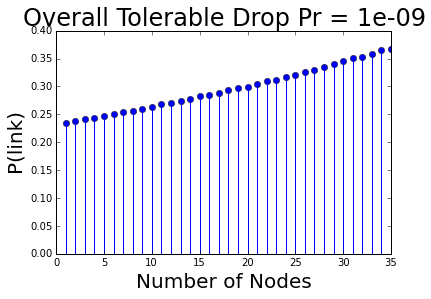

In [11]:
param = 10**(-9)
msgsize = 160
blocklength = 10000
rsblock = int(blocklength/14)
nominalSNR = 5 # parameter

plink = []
for num_nodes in range(1, 36): # 36
    rate = num_nodes*msgsize/blocklength
    k = (1-rate)*rsblock
    
    pdbit = arange(0,0.15,0.001) # bit error prob
    hammfail = 1 - ((1-pdbit)**14 + 14*(1-pdbit)**13*pdbit + (7*(1-pdbit)**6*pdbit)**2)

    for hcf in hammfail:
        reed = sum([nCr(rsblock, d)* hcf**d *(1-hcf)**(rsblock-d) for d in range(int(k/2)+1, rsblock)])
        if reed > param:
            break
#     hccrit = hammfail[hammfail.index(hcf)-1]
    idx = np.where(hammfail==hcf)[0][0]
    hccrit = hammfail[idx-1]
    pbcrit = pdbit[idx-1]
#     reeddrop = [sum([nCr(rsblock, d)* hcf**d *(1-hcf)**(rsblock-d) for d in range(int(k/2)+1, rsblock)]) for hcf in hammfail]
#     reedfail = filter(lambda x: x < param, reeddrop)
#     maxpd = pdbit[(len(reedfail)-1)]

#     pbadfade = [sum([nCr(num_nodes, a) * (1-pdb)**a * pdb**(num_nodes-a) * (1-(1-pdb))**(num_nodes-a) for a in range(num_nodes-1)]) for pdb in pdbit]
#     idfade = np.where(array(pbadfade)<param)[0][-1]
#     nominal_pb = pdbit[idfade]

    minSNR = (sqrt(2)*sp.special.erfinv(1-2*pbcrit))**2 #given bit drop prob min SNR needed to decode
#     nominalSNR = (sqrt(2)*sp.special.erfinv(1-2*nominal_pb))**2
    pbadfade = 1 - math.exp(-minSNR/nominalSNR)
    paddnoise = sum([nCr(rsblock, d)* hccrit**d *(1-hccrit)**(rsblock-d) for d in range(int(k/2)+1, rsblock)]) # pr reed solomon drop
    plink.append(pbadfade+paddnoise)
    
# figure()
stem(range(1, 36), plink, lw=2.0)
xlabel('Number of Nodes', fontsize=20)
ylabel('P(link)', fontsize=20)
title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)
savefig('160218_plink_9.pdf', bbox='tight')

## Finding the Nominal SNR Needed

General Errors

$$ \text{Number of nodes} = N $$
$$ \text{Rate} = \frac{N \cdot \text{msg_size} }{\text{blocklength}} $$

Hamming code error:
$$ \text{P(Hamming code fails)} = hcf = 1 - \left( (1-p_{bit})^{14} + {14 \choose 1} \, p_{bit} \, (1-p_{bit})^{13} + \left( {7 \choose 1} \, p_{bit} \, (1-p_{bit})^6 \right)^2 \right) $$

Blocklength: $\lfloor \frac{10,000 \text{ bits}}{14 \text{ bits per codeword}} \rfloor = 714$
$$ \text{P(Reed Solomon Code fails)} = \sum_{d=\lceil \frac{k}{2} \rceil + 1}^{\text{block}} {\text{block} \choose d} \, hcf^d \, (1-hcf)^{\text{block}-d} = \text{P(Additive Noise)}$$
$$ \text{P(Additive Noise)} < 10^{-9} \rightarrow p_{crit} $$
$$ \text{Actual SNR} = \left( Q^{-1}(p_{crit}) \right)^2 = \left( \sqrt{2} \, \text{erf}^{-1} (1 - 2p_{crit}) \right)^2 $$

$$ \text{P(protocol)} = \sum_{a = 0}^{N-1} {N \choose a} \, (1-p_{nominal})^a \, p_{nominal}^{N-a} \, \left( 1-(1-p_{badfade}^a - p_{add})^{N-a} \right) $$
$$ \text{P(protocol)} = 10^{-9} \rightarrow p_{nominal} $$

$$ p_{nominal} = \text{P(bad fade)} + \text{P(Additive Noise)} $$

$$ \text{P(bad fade)} = 1 - \text{exp} \left( \frac{-\text{Actual SNR}}{\text{Nominal SNR}} \right) $$

$$ \text{Nominal SNR} = \frac{-\text{Actual SNR}}{ln (1 - (p_{nominal} - p_{add}))} $$

In [3]:
param = 10**(-9)
msgsize = 160
blocklength = 10000
rsblock = int(blocklength/14)

nomSNR = []
padd = []
nomtracker = []
for num_nodes in range(1, 36): # [1, 35]
    rate = num_nodes*msgsize/blocklength
    k = (1-rate)*rsblock
    
    pdbit = arange(0,0.15,0.001) # bit error prob
    hammfail = 1 - ((1-pdbit)**14 + 14*pdbit*(1-pdbit)**13 + (7*pdbit*(1-pdbit)**6)**2)

    for hcf in hammfail:
        reed = sum([nCr(rsblock, d)* hcf**d *(1-hcf)**(rsblock-d) for d in range(int(k/2)+1, rsblock)])
        if reed > param:
            break
#     hccrit = hammfail[hammfail.index(hcf)-1]
    idx = np.where(hammfail==hcf)[0][0]
    hccrit = hammfail[idx-1]
    pbcrit = pdbit[idx-1]
#     reeddrop = [sum([nCr(rsblock, d)* hcf**d *(1-hcf)**(rsblock-d) for d in range(int(k/2)+1, rsblock)]) for hcf in hammfail]
#     reedfail = filter(lambda x: x < param, reeddrop)
#     maxpd = pdbit[(len(reedfail)-1)]

    pdb2 = arange(0, 0.3, 0.001)
    plink = [sum([nCr(num_nodes, a) * (1-pdb)**a * pdb**(num_nodes-a) * (1-(1-pdb**a)**(num_nodes-a)) for a in range(num_nodes)]) for pdb in pdb2]
#     print('plink', plink)
#     print('\n')
    idfade = np.where(array(plink)<=param)[0][-1]
#     print('idfade', np.where(array(plink)<=param))
    nominal_pb = pdb2[idfade]
    nomtracker.append(nominal_pb)
#     print(nominal_pb)

    minSNR = (sqrt(2)*sp.special.erfinv(1-2*pbcrit))**2 #given bit drop prob min SNR needed to decode
#     nominalSNR = (sqrt(2)*sp.special.erfinv(1-2*nominal_pb))**2
#     pbadfade = 1 - math.exp(-minSNR/nominalSNR)
    paddnoise = sum([nCr(rsblock, d)* hccrit**d *(1-hccrit)**(rsblock-d) for d in range(int(k/2)+1, rsblock)]) # pr reed solomon drop
    padd.append(paddnoise)
#     print('minSNR', minSNR)
#     print('paddnoise', paddnoise)
    nominalSNR = -minSNR / log(1-nominal_pb+paddnoise)
    nomSNR.append(nominalSNR)
#     plink.append(pbadfade+paddnoise)

In [4]:
# num_nodes = 35
# pdb = 0.25
# # pdb2 = arange(0, 0.001, 10**(-8))
# plink = sum([nCr(num_nodes, a) * (1-pdb)**a * pdb**(num_nodes-a) * (1-(1-pdb)**(num_nodes-a)) for a in range(num_nodes)])
# # print(plink)
# plink_new = 0
# for a in range(num_nodes):
#     x = nCr(num_nodes, a)
#     plink_new = plink_new + (x * (1-pdb)**a * pdb**(num_nodes-a) * (1-(1-pdb**a)**(num_nodes-a)) )
# #     print(x)
    
# print(plink_new)
    
#     print('plink', plink)
#     print('\n')
#     idfade = np.where(array(plink)<=param)[0][-1]
#     print('idfade', np.where(array(plink)<=param))
#     nominal_pb = pdb2[idfade]
#     print(nominal_pb)

[0.0, 0.0, 0.0, 0.002, 0.0060000000000000001, 0.013000000000000001, 0.021000000000000001, 0.032000000000000001, 0.043000000000000003, 0.053999999999999999, 0.067000000000000004, 0.079000000000000001, 0.090999999999999998, 0.10400000000000001, 0.11600000000000001, 0.127, 0.13900000000000001, 0.14999999999999999, 0.161, 0.17200000000000001, 0.182, 0.192, 0.20200000000000001, 0.21099999999999999, 0.22, 0.22900000000000001, 0.23800000000000002, 0.246, 0.254, 0.26200000000000001, 0.26900000000000002, 0.27700000000000002, 0.28400000000000003, 0.29099999999999998, 0.29799999999999999]


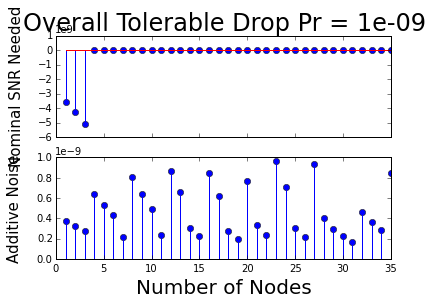

In [5]:
# Plots
x = range(1, num_nodes+1)

# fig1 = figure()
f1, orig = subplots(2, sharex=True)
orig[0].stem(x, nomSNR, lw=2.0)
orig[1].stem(x, padd, lw=2.0)
orig[1].set_xlabel('Number of Nodes', fontsize=20)
orig[0].set_ylabel('Nominal SNR Needed', fontsize=15, labelpad=15)
orig[1].set_ylabel('Additive Noise', fontsize=15, labelpad=15)
orig[0].set_title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)
# savefig('160218_plink_9.pdf', bbox='tight')

# figure()
# xlabel('Number of Nodes', fontsize=20)
# ylabel('Additive Noise', fontsize=20)
# title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)
# savefig('160218_plink_9.pdf', bbox='tight')

# figure()
# stem(x, 10*log10(array(padd)), lw=2.0)
# xlabel('Number of Nodes', fontsize=20)
# ylabel('Additive Noise (dB)', fontsize=20)
# title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)
# savefig('160218_plink_9.pdf', bbox='tight')
print(nomtracker)

/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


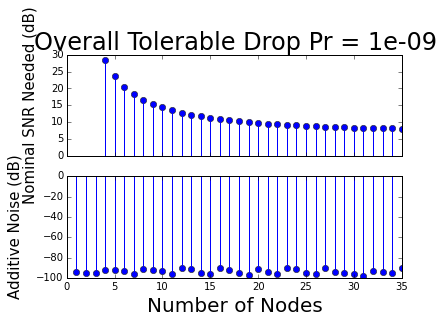

In [6]:
# fig2 = figure()
f2, db = subplots(2, sharex=True)
db[0].stem(x, 10*log10(array(nomSNR)), lw=2.0)
db[1].stem(x, 10*log10(array(padd)), lw=2.0)
db[1].set_xlabel('Number of Nodes', fontsize=20)
db[0].set_ylabel('Nominal SNR Needed (dB)', fontsize=15, labelpad=15)
db[1].set_ylabel('Additive Noise (dB)', fontsize=15, labelpad=15)
db[0].set_title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)
# savefig('160218_plink_9.pdf', bbox='tight')

In [7]:
# Erasures / Detection Mode 
param = 10**(-9)
msgsize = 160
blocklength = 10000
rsblock = int(blocklength/14)

nomSNR = []
padd = []
for num_nodes in range(1, 36): # [1, 35]
    rate = num_nodes*msgsize/blocklength
    k = (1-rate)*rsblock
    
    pdbit = arange(0,0.15,0.001) # bit error prob
    hammfail = 1 - ((1-pdbit)**14)

    for hcf in hammfail:
        reed = sum([nCr(rsblock, d)* hcf**d *(1-hcf)**(rsblock-d) for d in range(int(k)+1, rsblock)])
        if reed > param:
            break
#     hccrit = hammfail[hammfail.index(hcf)-1]
    idx = np.where(hammfail==hcf)[0][0]
    hccrit = hammfail[idx-1]
    pbcrit = pdbit[idx-1]
#     reeddrop = [sum([nCr(rsblock, d)* hcf**d *(1-hcf)**(rsblock-d) for d in range(int(k/2)+1, rsblock)]) for hcf in hammfail]
#     reedfail = filter(lambda x: x < param, reeddrop)
#     maxpd = pdbit[(len(reedfail)-1)]

    pdb2 = arange(0, 0.3, 0.001)
    plink = [sum([nCr(num_nodes, a) * (1-pdb)**a * pdb**(num_nodes-a) * (1-(1-pdb**a)**(num_nodes-a)) for a in range(num_nodes)]) for pdb in pdb2]
#     print('plink', plink)
#     print('\n')
    idfade = np.where(array(plink)<=param)[0][-1]
#     print('idfade', np.where(array(plink)<=param))
    nominal_pb = pdb2[idfade]
#     print(nominal_pb)

    minSNR = (sqrt(2)*sp.special.erfinv(1-2*pbcrit))**2 #given bit drop prob min SNR needed to decode
#     nominalSNR = (sqrt(2)*sp.special.erfinv(1-2*nominal_pb))**2
#     pbadfade = 1 - math.exp(-minSNR/nominalSNR)
    paddnoise = sum([nCr(rsblock, d)* hccrit**d *(1-hccrit)**(rsblock-d) for d in range(int(k)+1, rsblock)]) # pr reed solomon drop
    padd.append(paddnoise)
#     print('minSNR', minSNR)
#     print('paddnoise', paddnoise)
    nominalSNR = -minSNR / log(1-nominal_pb+paddnoise)
    nomSNR.append(nominalSNR)
#     plink.append(pbadfade+paddnoise)

/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:44: RuntimeWarning: divide by zero encountered in double_scalars


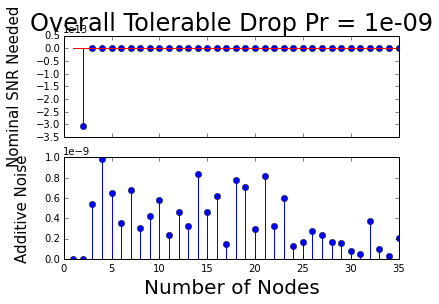

In [8]:
# Plots
x = range(1, num_nodes+1)

# fig1 = figure()
f1, orig = subplots(2, sharex=True)
orig[0].stem(x, nomSNR, lw=2.0)
orig[1].stem(x, padd, lw=2.0)
orig[1].set_xlabel('Number of Nodes', fontsize=20)
orig[0].set_ylabel('Nominal SNR Needed', fontsize=15, labelpad=15)
orig[1].set_ylabel('Additive Noise', fontsize=15, labelpad=15)
orig[0].set_title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)

/Users/leahdickstein/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


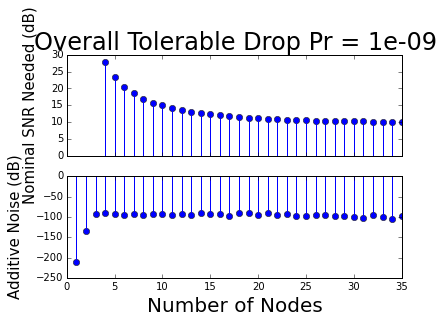

In [9]:
# fig2 = figure()
f2, db = subplots(2, sharex=True)
db[0].stem(x, 10*log10(array(nomSNR)), lw=2.0)
db[1].stem(x, 10*log10(array(padd)), lw=2.0)
db[1].set_xlabel('Number of Nodes', fontsize=20)
db[0].set_ylabel('Nominal SNR Needed (dB)', fontsize=15, labelpad=15)
db[1].set_ylabel('Additive Noise (dB)', fontsize=15, labelpad=15)
db[0].set_title('Overall Tolerable Drop Pr = {0}'.format(param), fontsize=24)
# savefig('160218_plink_9.pdf', bbox='tight')

## 3-Repetition Code

**Needs Updating**

Payload = x

Rates in range $[\frac{?}{?}, \frac{1}{3}] \rightarrow [\frac{x}{768}, \frac{x}{3x}]$, with the denominator increasing by 3 bits (1 RS word.)

Repetition code = 1 information bit, 2 parity bits, max rate = 1/3

8 Repetition codewords put together $\rightarrow$ 8 information bits, 16 parity bits, max rate = 1/3

Reed-Solomon in field $2^8 = 256$, $256 \cdot 3 = 768$

200 information bits = 50 Hamming codewords = 25 Reed-Solomon words

**Red Alert: This gets complicated.**

Probability repetition codeword fails:
$$ rcf = 1 - \left( (1-p_d)^{3} + {3 \choose 1} p_d(1-p_d)^{2} \right) $$
$$ \text{8-fail} = 1 - (1-rcf)^8 $$

Probability Reed Solomon message fails:
$$ \text{rsfail } = \sum_{d= \lceil \frac{k}{2} \rceil +1}^{25+k} {25+k \choose d} (hcf)^d (1-hcf)^{25+k-d}$$
where d stands for dropped RS words, and this sum represents enough of the codeword is dropped that important words start being dropped as well. All of k (n+k) is dropped, and the 'final' 25 words in the payload (that are necessary for decoding) are now being encroached upon.) k is in the range (0, 231) so that the final blocklength is in the range (25, 256).

$$ \text{rsfail } < 10^{-5} $$